In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:\\Users\\jeetg\\code\\crime analyser\\Sample Crime Dataset - Sheet1.csv")

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,8/25/07 9:22,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,8/17/15 15:03,NaN,NaN,NaN
1,25953,JE240540,5/24/21 15:06,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/23 15:39,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,6/26/21 9:24,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/23 15:39,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/9/23 7:30,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023,11/18/23 15:39,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/23 7:59,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/9/23 15:41,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    999 non-null    int64  
 1   Case Number           999 non-null    object 
 2   Date                  999 non-null    object 
 3   Block                 999 non-null    object 
 4   IUCR                  999 non-null    object 
 5   Primary Type          999 non-null    object 
 6   Description           999 non-null    object 
 7   Location Description  997 non-null    object 
 8   Arrest                999 non-null    bool   
 9   Domestic              999 non-null    bool   
 10  Beat                  999 non-null    int64  
 11  District              999 non-null    int64  
 12  Ward                  998 non-null    float64
 13  Community Area        998 non-null    float64
 14  FBI Code              999 non-null    object 
 15  X Coordinate          9

In [4]:
df.isnull().sum()

ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     2
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                     1
Community Area           1
FBI Code                 0
X Coordinate            20
Y Coordinate            20
Year                     0
Updated On               0
Latitude                20
Longitude               20
Location                20
dtype: int64

C:\Users\jeetg\AppData\Local\Temp\ipykernel_21296\3723552450.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


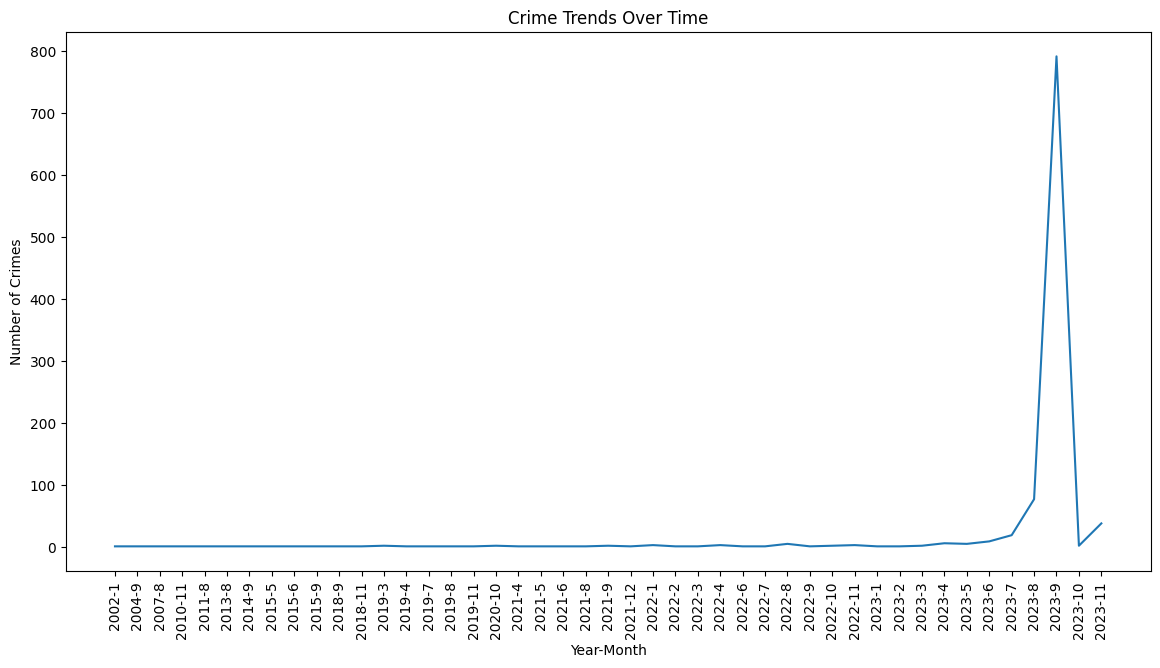

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Group by year and month
crime_trends = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Plot the trends
plt.figure(figsize=(14, 7))
plt.plot(crime_trends['Year'].astype(str) + '-' + crime_trends['Month'].astype(str), crime_trends['Count'])
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.title('Crime Trends Over Time')
plt.show()

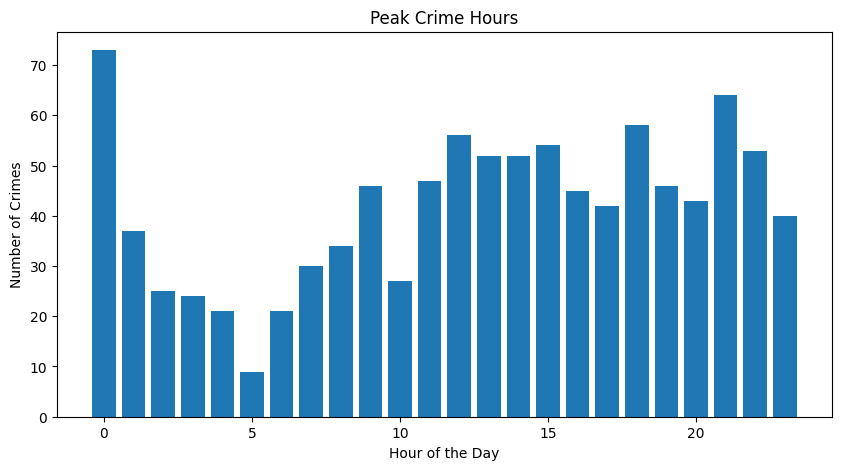

In [6]:
df['Hour'] = df['Date'].dt.hour

# Group by hour
peak_hours = df.groupby('Hour').size().reset_index(name='Count')

# Plot the peak hours
plt.figure(figsize=(10, 5))
plt.bar(peak_hours['Hour'], peak_hours['Count'])
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Peak Crime Hours')
plt.show()


In [14]:
import folium
from folium.plugins import HeatMap

# Filter for non-null latitude and longitude
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a base map
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add heat map
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Save the map
m.save('C:\\Users\\jeetg\\code\\crime analyser\\crime_heatmap.html')


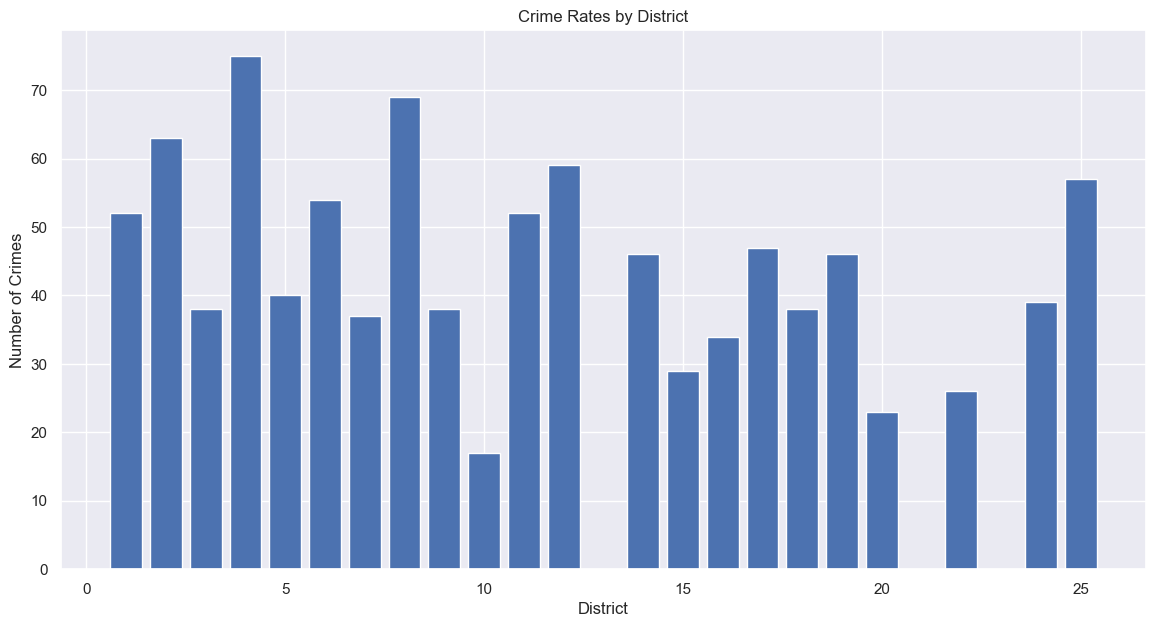

In [15]:
# Group by district
district_analysis = df.groupby('District').size().reset_index(name='Count')

# Plot the district analysis
plt.figure(figsize=(14, 7))
plt.bar(district_analysis['District'], district_analysis['Count'])
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.title('Crime Rates by District')
plt.show()

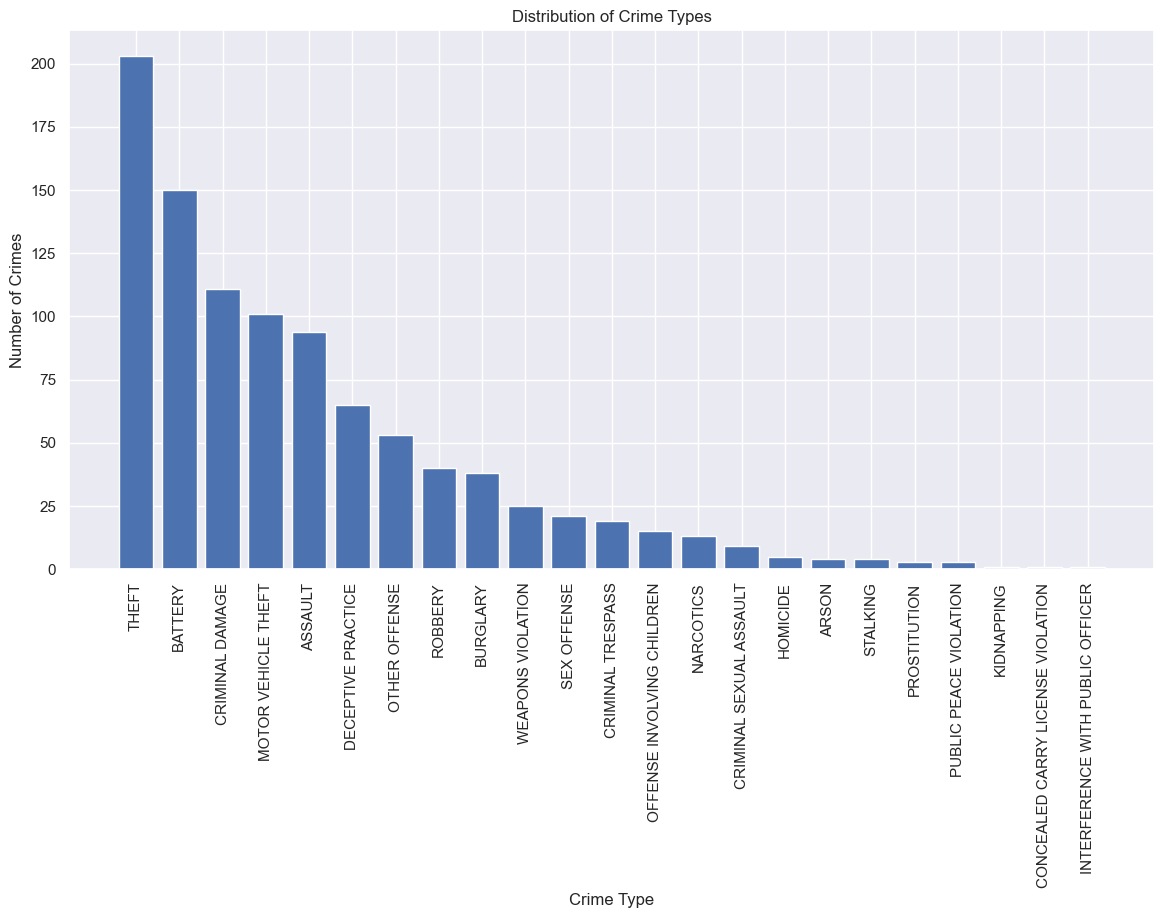

In [16]:
# Group by primary type
crime_type_distribution = df['Primary Type'].value_counts().reset_index()
crime_type_distribution.columns = ['Primary Type', 'Count']

# Plot the distribution
plt.figure(figsize=(14, 7))
plt.bar(crime_type_distribution['Primary Type'], crime_type_distribution['Count'])
plt.xticks(rotation=90)
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.title('Distribution of Crime Types')
plt.show()

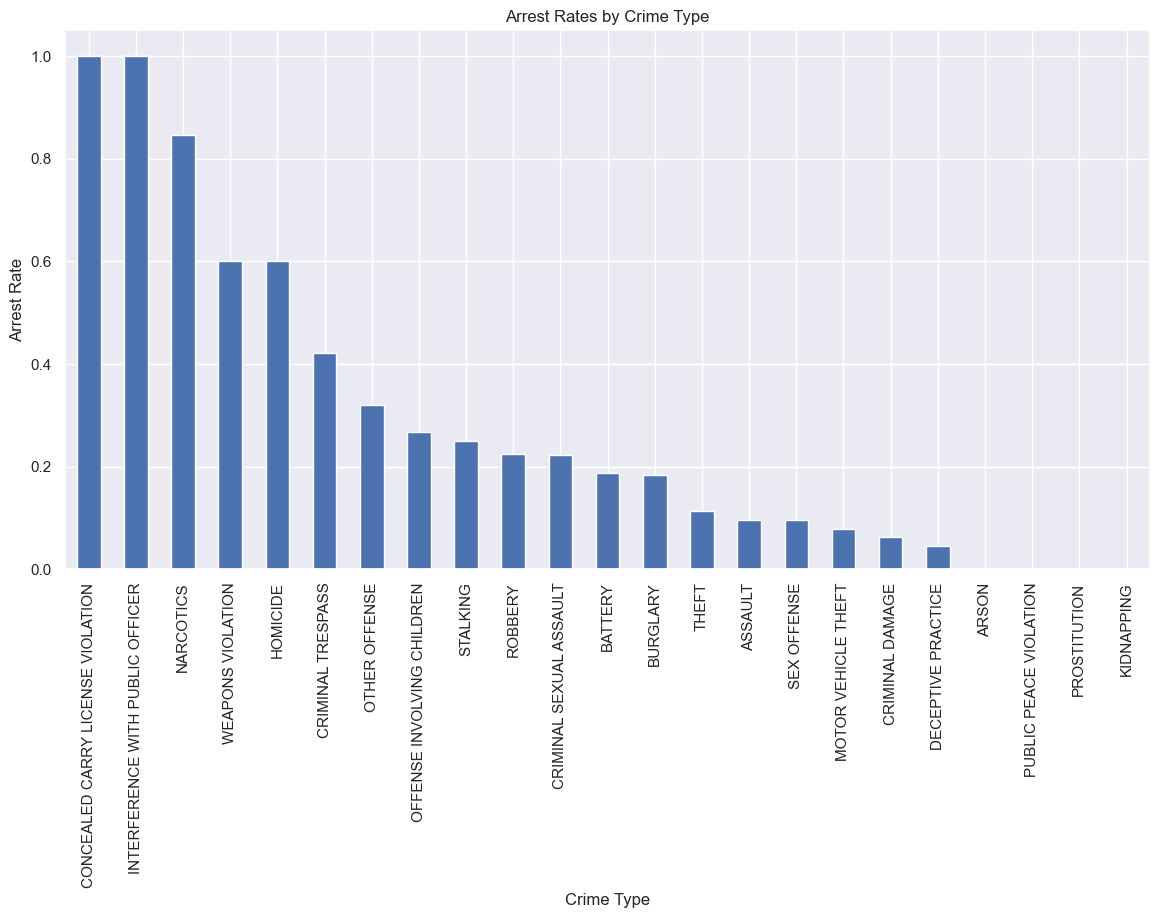

In [17]:
arrest_rates = df.groupby(['Primary Type', 'Arrest']).size().unstack(fill_value=0)
arrest_rates['Arrest Rate'] = arrest_rates[True] / (arrest_rates[True] + arrest_rates[False])

# Plot the arrest rates
arrest_rates['Arrest Rate'].sort_values(ascending=False).plot(kind='bar', figsize=(14, 7))
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rates by Crime Type')
plt.show()

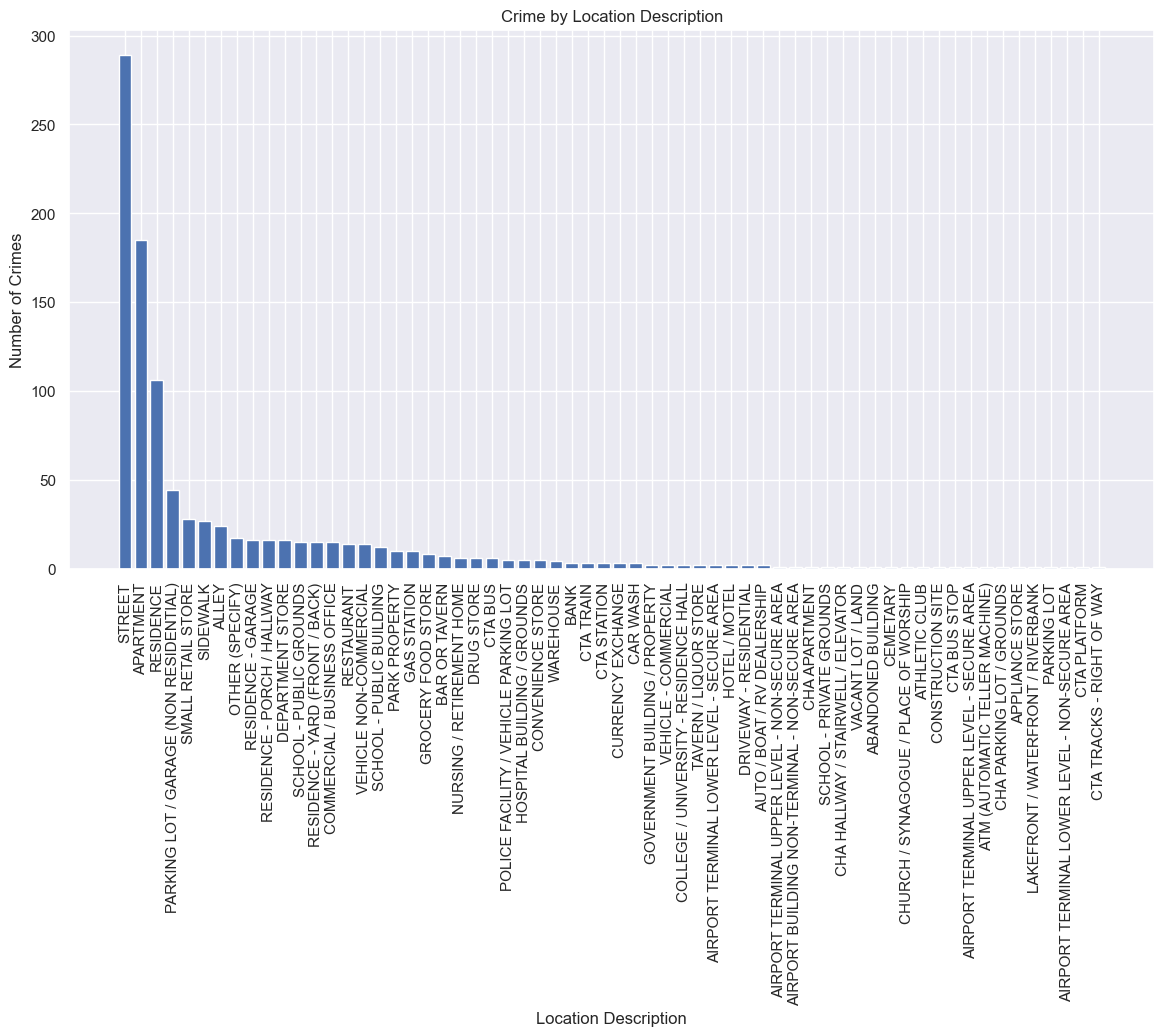

In [18]:
# Group by location description
location_description_analysis = df['Location Description'].value_counts().reset_index()
location_description_analysis.columns = ['Location Description', 'Count']

# Plot the location description analysis
plt.figure(figsize=(14, 7))
plt.bar(location_description_analysis['Location Description'], location_description_analysis['Count'])
plt.xticks(rotation=90)
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.title('Crime by Location Description')
plt.show()

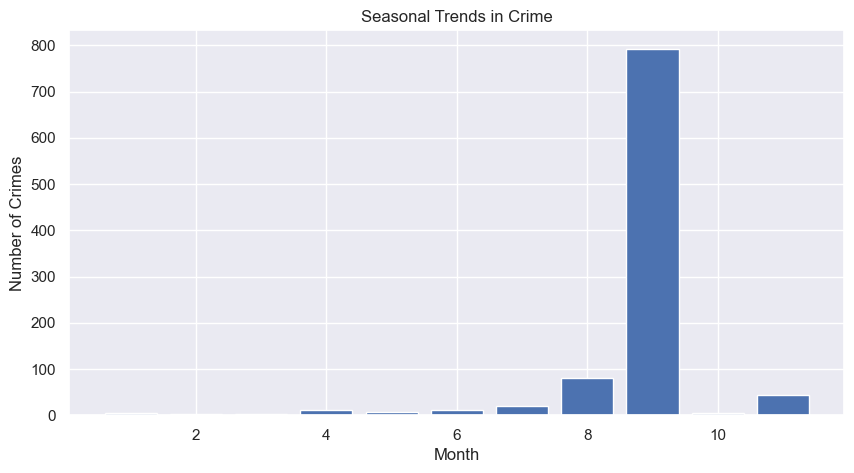

In [19]:
# Group by month
seasonal_trends = df.groupby('Month').size().reset_index(name='Count')

# Plot the seasonal trends
plt.figure(figsize=(10, 5))
plt.bar(seasonal_trends['Month'], seasonal_trends['Count'])
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Seasonal Trends in Crime')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Feature selection
features = ['Year', 'Month', 'Hour', 'District', 'Ward', 'Community Area']
X = df[features]
y = df['Arrest']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.99      0.89       236
        True       0.33      0.02      0.03        58

    accuracy                           0.80       294
   macro avg       0.57      0.50      0.46       294
weighted avg       0.71      0.80      0.72       294

[[234   2]
 [ 57   1]]


In [23]:
import pickle

with open('C:\\Users\\jeetg\\code\\crime analyser\\crime_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming the data is already cleaned and preprocessed as in the previous steps
data = pd.read_csv('/mnt/data/cleaned_crime_data.csv')

# Features and target variable
X = data[['Beat', 'District', 'Ward', 'Community Area', 'Year', 'Month', 'Day', 'Hour']]
y = data['Arrest']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model
with open('/mnt/data/crime_model.pkl', 'wb') as file:
    pickle.dump(model, file)
